In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [54]:
class Dice:
    """This class constructs a dice with different sized vertizes. Note, that the numbers on the dice are distributed as follows:
On the faces with the a and b vertizes are the numbers 1 and 6.
On the faces with the b and c vertizes are the numbers 2 and 5.
On the faces with the a and c vertizes are the numebrs 3 and 4.
"""   
    def __init__(self, a, b, c):
        self.a=a
        self.b=b
        self.c=c

    @property
    def faces(self):
        x = self.a*self.b
        y = self.b*self.c
        z = self.a*self.c
        return x, y, z

    @property
    def prob(self):
        x, y, z = self.faces
        return np.array([x, y, z, z, y, x])*0.5/(x+y+z)

    def roll_dice(self):
        pop = [1, 2, 3, 4, 5, 6]
        weights = self.prob
        result = rd.choices(pop, weights)
        return result

In [113]:
die =Dice(1,1,3)

In [114]:
die.faces

(1, 3, 3)

In [115]:
die.prob

array([0.07142857, 0.21428571, 0.21428571, 0.21428571, 0.21428571,
       0.07142857])

In [116]:
roll_list = []
for i in range(1,10000):
    roll_list.append(die.roll_dice())
data = np.array(roll_list)

In [117]:
df = pd.DataFrame(np.unique(data, return_counts=True))

In [118]:
df.columns = df.iloc[0]
df.drop(df.index[0])

,1,2,3,4,5,6
1,767,2079,2116,2120,2215,702


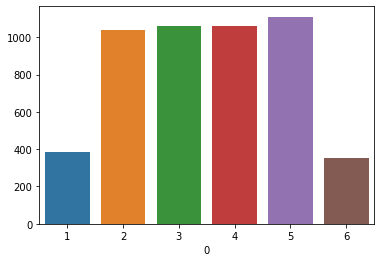

In [119]:
sns.barplot(data=df, ci=None)